<a href="https://colab.research.google.com/github/helenkristanti/Random_Forest_Skripsi/blob/main/APP_01_SKRIPSI_HELEN_PREPROCESSING%2CTRANSLATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CRAWLING DATA***

In [ ]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git
!pip install pandas

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-jepedueh
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-jepedueh
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 614d4c2029a62d348ca56598f87c425966aaec66
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for snscrape: filename=snscrape-0.7.0.20230622-py3-none-any.whl size=74814 sha256=6914143b368db6aeab3ccb22dac3de0a282db29418ea4fc40ae5d8c35361a633
  Stored in directory: /tmp/pip-ephem-wheel-cache-1fttjfro/wheels/05/e9/f7/57056e7c7e44b1feed932fa49fdec9d706c4f563e37160ab74
Successfully built snscrape


In [ ]:
import os
import datetime

# Batasi jumlah hasil yang diambil
max_results = 3000

# Gunakan Twitter search untuk mencari tweet yang di-favoritkan minimal 10000 kali dan berbahasa Indonesia
twitter_search = "Kim Seok Jin OR Kim Nam Joon lang:id since:2022-01-01 until:2023-01-01"

# Tentukan nama file dengan format "<kueri pencarian>_<tanggal saat ini>.json"
filename = f"{twitter_search.replace(' ', '_').replace(':', '-').replace('#', '')}_{datetime.date.today().strftime('%Y-%m-%d')}.json"

USING_TOP_SEARCH = False

snscrape_params = '--jsonl --max-results'
twitter_search_params = ''

if USING_TOP_SEARCH:
    twitter_search_params += "--top"

snscrape_search_query = f"snscrape {snscrape_params} {max_results} twitter-search {twitter_search_params} '{twitter_search}' > {filename}"
print(snscrape_search_query)
os.system(snscrape_search_query)

In [ ]:
import pandas as pd
import ast
import json

# Membaca file JSON hasil dari perintah CLI sebelumnya dan membuat dataframe pandas
tweets_df = pd.read_json(filename, lines=True)

data = 'dataBTS.csv'

# Membuat kamus untuk mengganti nama kolom
new_columns = {
    'conversationId': 'Conv. ID',
    'url': 'URL',
    'date': 'Date',
    'rawContent': 'Tweet',
    'id': 'ID',
    'replyCount': 'Replies',
    'retweetCount': 'Retweets',
    'likeCount': 'Likes',
    'quoteCount': 'Quotes',
    'bookmarkCount': 'Bookmarks',
    'lang': 'Language',
    'links': 'Links',
    'media': 'Media',
    'retweetedTweet': 'Retweeted Tweet',
    'username': 'Username'
}

if len(tweets_df) == 0:
    print('Pencarian tidak ditemukan coba ganti keyword lain, keywordmu: ', twitter_search)
    exit()
else:
  # Memilih kolom yang akan digunakan dan mengganti nama kolom menggunakan kamus yang telah dibuat
  tweets_df = tweets_df.loc[:, ['url', 'date', 'rawContent', 'id',
                            'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
                            'conversationId', 'lang', 'links',
                            'media', 'retweetedTweet', 'bookmarkCount', 'username']]
  tweets_df = tweets_df.rename(columns=new_columns)

  # Ekstrak fullUrl dari kolom media dan url dari kolom links
  tweets_df['Media'] = tweets_df['Media'].apply(lambda x: x[0]['fullUrl'] if isinstance(x, list) and x and isinstance(x[0], dict) and 'fullUrl' in x[0] else None)
  tweets_df['Links'] = tweets_df['Links'].apply(lambda x: x[0]['url'] if isinstance(x, list) and x and isinstance(x[0], dict) and 'url' in x[0] else None)

  tweets_df.to_csv(data, index=False)

In [ ]:
import pandas as pd
# Load dataset
def load_data():
    data = pd.read_csv('dataBTS.csv')
    return data

data = load_data()
data.head(4)

In [ ]:
data.info()

# ***IMPORT LIBRARIES***

In [ ]:
# Import libraries
!pip install nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# ***READ THE CRAWLING RESULT DATASET***

In [ ]:
import pandas as pd
# Load dataset
def load_data():
    data = pd.read_csv('datasetBTS-SKRIPSI-RandomForest.csv')
    return data

data = load_data()
data.head(4)

,created_at,full_text,reply_count,retweet_count,favorite_count,lang
0,Fri May 12 03:44:28 +0000 2023,"Official BTS PTD Seoul Mini Photocards (Jin,RM...",0,3,0,in
1,Sat May 13 15:11:54 +0000 2023,[#YOUTH ] \n\nBTS Universe dizisi 'YOUTH' oyun...,3,82,668,in
2,Sat May 13 11:55:58 +0000 2023,Saya jelaskan ya. BTS (Hangul: 방탄소년단; Bangtan ...,1,0,0,in
3,Wed May 03 02:49:17 +0000 2023,Yoongi Sowoozoo Mini pc set with pajama pc\n\n...,0,1,1,in


# ***FOR INFORMATION DATASET***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      1442 non-null   object
 1   full_text       1442 non-null   object
 2   reply_count     1442 non-null   int64 
 3   retweet_count   1442 non-null   int64 
 4   favorite_count  1442 non-null   int64 
 5   lang            1442 non-null   object
dtypes: int64(3), object(3)
memory usage: 67.7+ KB


# ***CONVERT DATASET TO DATA FRAME***

In [ ]:
#ubah dataframe sesuai column
df  = pd.DataFrame(data[['created_at','reply_count','retweet_count','favorite_count','full_text']])
df.head(4)

,created_at,reply_count,retweet_count,favorite_count,full_text
0,Fri May 12 03:44:28 +0000 2023,0,3,0,"Official BTS PTD Seoul Mini Photocards (Jin,RM..."
1,Sat May 13 15:11:54 +0000 2023,3,82,668,[#YOUTH ] \n\nBTS Universe dizisi 'YOUTH' oyun...
2,Sat May 13 11:55:58 +0000 2023,1,0,0,Saya jelaskan ya. BTS (Hangul: 방탄소년단; Bangtan ...
3,Wed May 03 02:49:17 +0000 2023,0,1,1,Yoongi Sowoozoo Mini pc set with pajama pc\n\n...


# ***DATA CLEANING***

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords


# cleansing data
def remove_URL(tweet):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_html(tweet):
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_angka(tweet):
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)

    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    return tweet

def remove_punct(tweets):
    translator = str.maketrans('', '', string.punctuation)
    return tweets.translate(translator)
    #sebuah fungsi yang digunakan untuk menghapus tanda baca dari teks atau tweet yang diberikan

data['cleasing'] = data['full_text'].apply(lambda x: remove_URL(x))
data['cleasing'] = data['cleasing'].apply(lambda x: remove_html(x))
data['cleasing'] = data['cleasing'].apply(lambda x: remove_emoji(x))
data['cleasing'] = data['cleasing'].apply(lambda x: remove_punct(x))
data['cleasing'] = data['cleasing'].apply(lambda x: remove_angka(x))

data.head(2)

import numpy as np
from google.colab import autoviz
df_6717204476339744401 = autoviz.get_df('df_6717204476339744401')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6717204476339744401, *['reply_count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8228995179455071774 = autoviz.get_df('df_8228995179455071774')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8228995179455071774, *['retweet_count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5928968020609051963 = autoviz.get_df('df_5928968020609051963')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5928968020609051963, *['favorite_count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_270482019137854733 = autoviz.get_df('df_270482019137854733')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_270482019137854733, *['reply_count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8910931381448713831 = autoviz.get_df('df_8910931381448713831')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8910931381448713831, *['retweet_count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1458711664253501099 = autoviz.get_df('df_1458711664253501099')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1458711664253501099, *['favorite_count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8896847883273668909 = autoviz.get_df('df_8896847883273668909')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8896847883273668909, *['created_at'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3917940484350714877 = autoviz.get_df('df_3917940484350714877')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3917940484350714877, *['full_text'], **{})
chart

import numpy as np
from google.colab import autoviz
df_489205506583342544 = autoviz.get_df('df_489205506583342544')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_489205506583342544, *['cleasing'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7018823843690754632 = autoviz.get_df('df_7018823843690754632')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7018823843690754632, *[[['reply_count', 'retweet_count'], ['retweet_count', 'favorite_count']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_4640014481585930695 = autoviz.get_df('df_4640014481585930695')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_4640014481585930695, *['created_at', 'full_text'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7767020263265822160 = autoviz.get_df('df_7767020263265822160')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_7767020263265822160, *['full_text', 'cleasing'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8606633776257308819 = autoviz.get_df('df_8606633776257308819')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8606633776257308819, *['reply_count', 'created_at'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6439159784740911979 = autoviz.get_df('df_6439159784740911979')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6439159784740911979, *['reply_count', 'full_text'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5951483678515983814 = autoviz.get_df('df_5951483678515983814')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5951483678515983814, *['reply_count', 'cleasing'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5056289067193220749 = autoviz.get_df('df_5056289067193220749')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5056289067193220749, *['retweet_count', 'created_at'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_9058392592593984549 = autoviz.get_df('df_9058392592593984549')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_9058392592593984549, *['reply_count', 'count()', 'created_at'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4295470069608759695 = autoviz.get_df('df_4295470069608759695')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4295470069608759695, *['reply_count', 'count()', 'full_text'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4498154320480916612 = autoviz.get_df('df_4498154320480916612')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4498154320480916612, *['reply_count', 'count()', 'cleasing'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6010164122498593913 = autoviz.get_df('df_6010164122498593913')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6010164122498593913, *['retweet_count', 'count()', 'created_at'], **{})
chart

,created_at,full_text,reply_count,retweet_count,favorite_count,lang,cleasing
0,Fri May 12 03:44:28 +0000 2023,"Official BTS PTD Seoul Mini Photocards (Jin,RM...",0,3,0,in,Official BTS PTD Seoul Mini Photocards JinRMam...
1,Sat May 13 15:11:54 +0000 2023,[#YOUTH ] \n\nBTS Universe dizisi 'YOUTH' oyun...,3,82,668,in,YOUTH nnBTS Universe dizisi YOUTH oyuncuların...


# **CASE FOLDING AND TOKENIZATION**

In [ ]:
# case folding mengubah kata yang memiliki huruf besar kehuruf kecil
# tokenization memisahkan setiap kata dengan tanda baca koma
data['Tokenization and Case Folding'] = data['cleasing'].apply(lambda x: x.lower().split())

data.head(2)

,created_at,full_text,reply_count,retweet_count,favorite_count,lang,cleasing,Tokenization and Case Folding
0,Fri May 12 03:44:28 +0000 2023,"Official BTS PTD Seoul Mini Photocards (Jin,RM...",0,3,0,in,Official BTS PTD Seoul Mini Photocards JinRMam...,"[official, bts, ptd, seoul, mini, photocards, ..."
1,Sat May 13 15:11:54 +0000 2023,[#YOUTH ] \n\nBTS Universe dizisi 'YOUTH' oyun...,3,82,668,in,YOUTH nnBTS Universe dizisi YOUTH oyuncuların...,"[youth, nnbts, universe, dizisi, youth, oyuncu..."


# ***FILTERING ATAU STOPWORD REMOVAL***

In [ ]:
#stopword removal menghapus kata yang tidak sesuai dengan kamus data
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

data['Filtering/ stopword removal'] = data['Tokenization and Case Folding'].apply(lambda x: remove_stopwords(x))

data.head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,created_at,full_text,reply_count,retweet_count,favorite_count,lang,cleasing,Tokenization and Case Folding,Filtering/ stopword removal
0,Fri May 12 03:44:28 +0000 2023,"Official BTS PTD Seoul Mini Photocards (Jin,RM...",0,3,0,in,Official BTS PTD Seoul Mini Photocards JinRMam...,"[official, bts, ptd, seoul, mini, photocards, ...","[official, bts, ptd, seoul, mini, photocards, ..."
1,Sat May 13 15:11:54 +0000 2023,[#YOUTH ] \n\nBTS Universe dizisi 'YOUTH' oyun...,3,82,668,in,YOUTH nnBTS Universe dizisi YOUTH oyuncuların...,"[youth, nnbts, universe, dizisi, youth, oyuncu...","[youth, nnbts, universe, dizisi, youth, oyuncu..."


# ***INSTAL LIBRARIES STEMMER***

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


# ***STEAMMING DATA***

In [ ]:
# membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# mendefinisikan fungsi untuk membendung teks
def stem_text(text):
    return [stemmer.stem(word) for word in text]

# terapkan stemming ke kolom 'Tweet' dan buat kolom baru 'stemmed_tweet'
data['tweet'] = data['Filtering/ stopword removal'].apply(lambda x: ' '.join(stem_text(x)))

# melihat 2 baris pertama dari data
data.head(2)

,created_at,full_text,reply_count,retweet_count,favorite_count,lang,cleasing,Tokenization and Case Folding,Filtering/ stopword removal,tweet
0,Fri May 12 03:44:28 +0000 2023,"Official BTS PTD Seoul Mini Photocards (Jin,RM...",0,3,0,in,Official BTS PTD Seoul Mini Photocards JinRMam...,"[official, bts, ptd, seoul, mini, photocards, ...","[official, bts, ptd, seoul, mini, photocards, ...",official bts ptd seoul mini photocards jinrmam...
1,Sat May 13 15:11:54 +0000 2023,[#YOUTH ] \n\nBTS Universe dizisi 'YOUTH' oyun...,3,82,668,in,YOUTH nnBTS Universe dizisi YOUTH oyuncuların...,"[youth, nnbts, universe, dizisi, youth, oyuncu...","[youth, nnbts, universe, dizisi, youth, oyuncu...",youth nnbts universe dizisi youth oyuncularınn...


import numpy as np
from google.colab import autoviz
df_8856273870668648692 = autoviz.get_df('df_8856273870668648692')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8856273870668648692, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1159116646550722487 = autoviz.get_df('df_1159116646550722487')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1159116646550722487, *['reply_count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5317029063082535483 = autoviz.get_df('df_5317029063082535483')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5317029063082535483, *['retweet_count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7177063242911087223 = autoviz.get_df('df_7177063242911087223')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7177063242911087223, *['favorite_count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8716837523513131702 = autoviz.get_df('df_8716837523513131702')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8716837523513131702, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1694130177870118960 = autoviz.get_df('df_1694130177870118960')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1694130177870118960, *['reply_count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7487753163690761136 = autoviz.get_df('df_7487753163690761136')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7487753163690761136, *['retweet_count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7993676737464312065 = autoviz.get_df('df_7993676737464312065')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7993676737464312065, *['favorite_count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5496183851086882726 = autoviz.get_df('df_5496183851086882726')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_5496183851086882726, *['created_at'], **{})
chart

import numpy as np
from google.colab import autoviz
df_368414441516099797 = autoviz.get_df('df_368414441516099797')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_368414441516099797, *['full_text'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7341956443712692187 = autoviz.get_df('df_7341956443712692187')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_7341956443712692187, *['cleasing'], **{})
chart

import numpy as np
from google.colab import autoviz
df_201682424105436282 = autoviz.get_df('df_201682424105436282')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_201682424105436282, *['tweet'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4855944445072958373 = autoviz.get_df('df_4855944445072958373')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4855944445072958373, *[[['index', 'reply_count'], ['reply_count', 'retweet_count'], ['retweet_count', 'favorite_count']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6312660361248830511 = autoviz.get_df('df_6312660361248830511')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_6312660361248830511, *['created_at', 'full_text'], **{})
chart

import numpy as np
from google.colab import autoviz
df_914005543564651482 = autoviz.get_df('df_914005543564651482')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_914005543564651482, *['full_text', 'cleasing'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5260071259907153888 = autoviz.get_df('df_5260071259907153888')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_5260071259907153888, *['cleasing', 'tweet'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6185412164639300866 = autoviz.get_df('df_6185412164639300866')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6185412164639300866, *['index', 'created_at'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_161329788601075407 = autoviz.get_df('df_161329788601075407')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_161329788601075407, *['index', 'full_text'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2847220131307009840 = autoviz.get_df('df_2847220131307009840')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2847220131307009840, *['index', 'cleasing'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6692144402438775874 = autoviz.get_df('df_6692144402438775874')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6692144402438775874, *['index', 'tweet'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_412565076349778410 = autoviz.get_df('df_412565076349778410')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_412565076349778410, *['index', 'count()', 'created_at'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4226491625054925411 = autoviz.get_df('df_4226491625054925411')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4226491625054925411, *['index', 'count()', 'full_text'], **{})
chart

import numpy as np
from google.colab import autoviz
df_575755312984557981 = autoviz.get_df('df_575755312984557981')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_575755312984557981, *['index', 'count()', 'cleasing'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8948917398636372490 = autoviz.get_df('df_8948917398636372490')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8948917398636372490, *['index', 'count()', 'tweet'], **{})
chart

# ***DROP DATA DUPLICATES***

In [ ]:
data.drop_duplicates(subset ="tweet", keep = 'first', inplace = True)
data.head(4)

,created_at,full_text,reply_count,retweet_count,favorite_count,lang,cleasing,Tokenization and Case Folding,Filtering/ stopword removal,tweet
0,Fri May 12 03:44:28 +0000 2023,"Official BTS PTD Seoul Mini Photocards (Jin,RM...",0,3,0,in,Official BTS PTD Seoul Mini Photocards JinRMam...,"[official, bts, ptd, seoul, mini, photocards, ...","[official, bts, ptd, seoul, mini, photocards, ...",official bts ptd seoul mini photocards jinrmam...
1,Sat May 13 15:11:54 +0000 2023,[#YOUTH ] \n\nBTS Universe dizisi 'YOUTH' oyun...,3,82,668,in,YOUTH nnBTS Universe dizisi YOUTH oyuncuların...,"[youth, nnbts, universe, dizisi, youth, oyuncu...","[youth, nnbts, universe, dizisi, youth, oyuncu...",youth nnbts universe dizisi youth oyuncularınn...
2,Sat May 13 11:55:58 +0000 2023,Saya jelaskan ya. BTS (Hangul: 방탄소년단; Bangtan ...,1,0,0,in,Saya jelaskan ya BTS Hangul 방탄소년단 Bangtan Sony...,"[saya, jelaskan, ya, bts, hangul, 방탄소년단, bangt...","[ya, bts, hangul, 방탄소년단, bangtan, sonyeondan, ...",ya bts hangul bangtan sonyeondan bangtan boys...
3,Wed May 03 02:49:17 +0000 2023,Yoongi Sowoozoo Mini pc set with pajama pc\n\n...,0,1,1,in,Yoongi Sowoozoo Mini pc set with pajama pcnn₱n...,"[yoongi, sowoozoo, mini, pc, set, with, pajama...","[yoongi, sowoozoo, mini, pc, set, with, pajama...",yoongi sowoozoo mini pc set with pajama pcnn n...


# ***SAVE DATASET PREPROCESSING STEP BY STEP***

In [ ]:
data.to_csv('Hasi-Preprocessing-Data#01.csv',encoding='utf8', index=False)

# ***READ DATASET HASIL PREPROCESSING***

In [ ]:
import pandas as pd
# Load dataset
def load_data():
    data = pd.read_csv('Hasi-Preprocessing-Data#01.csv')
    return data

data = load_data()
data.head(4)

,created_at,full_text,reply_count,retweet_count,favorite_count,lang,cleasing,Tokenization and Case Folding,Filtering/ stopword removal,tweet
0,Fri May 12 03:44:28 +0000 2023,"Official BTS PTD Seoul Mini Photocards (Jin,RM...",0,3,0,in,Official BTS PTD Seoul Mini Photocards JinRMam...,"['official', 'bts', 'ptd', 'seoul', 'mini', 'p...","['official', 'bts', 'ptd', 'seoul', 'mini', 'p...",official bts ptd seoul mini photocards jinrmam...
1,Sat May 13 15:11:54 +0000 2023,[#YOUTH ] \n\nBTS Universe dizisi 'YOUTH' oyun...,3,82,668,in,YOUTH nnBTS Universe dizisi YOUTH oyuncuların...,"['youth', 'nnbts', 'universe', 'dizisi', 'yout...","['youth', 'nnbts', 'universe', 'dizisi', 'yout...",youth nnbts universe dizisi youth oyuncularınn...
2,Sat May 13 11:55:58 +0000 2023,Saya jelaskan ya. BTS (Hangul: 방탄소년단; Bangtan ...,1,0,0,in,Saya jelaskan ya BTS Hangul 방탄소년단 Bangtan Sony...,"['saya', 'jelaskan', 'ya', 'bts', 'hangul', '방...","['ya', 'bts', 'hangul', '방탄소년단', 'bangtan', 's...",ya bts hangul bangtan sonyeondan bangtan boys...
3,Wed May 03 02:49:17 +0000 2023,Yoongi Sowoozoo Mini pc set with pajama pc\n\n...,0,1,1,in,Yoongi Sowoozoo Mini pc set with pajama pcnn₱n...,"['yoongi', 'sowoozoo', 'mini', 'pc', 'set', 'w...","['yoongi', 'sowoozoo', 'mini', 'pc', 'set', 'w...",yoongi sowoozoo mini pc set with pajama pcnn n...


# ***FOR INFORMATION DATASET AFTER PREPROCESSING***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   created_at                     764 non-null    object
 1   full_text                      764 non-null    object
 2   reply_count                    764 non-null    int64 
 3   retweet_count                  764 non-null    int64 
 4   favorite_count                 764 non-null    int64 
 5   lang                           764 non-null    object
 6   cleasing                       764 non-null    object
 7   Tokenization and Case Folding  764 non-null    object
 8   Filtering/ stopword removal    764 non-null    object
 9   tweet                          764 non-null    object
dtypes: int64(3), object(7)
memory usage: 59.8+ KB


# ***CONVERT DATASET TO DATA FRAME***

In [ ]:
#ubah dataframe sesuai column
df  = pd.DataFrame(data[['created_at','reply_count','retweet_count','favorite_count','tweet']])
df.head(4)

,created_at,reply_count,retweet_count,favorite_count,tweet
0,Fri May 12 03:44:28 +0000 2023,0,3,0,official bts ptd seoul mini photocards jinrmam...
1,Sat May 13 15:11:54 +0000 2023,3,82,668,youth nnbts universe dizisi youth oyuncularınn...
2,Sat May 13 11:55:58 +0000 2023,1,0,0,ya bts hangul bangtan sonyeondan bangtan boys...
3,Wed May 03 02:49:17 +0000 2023,0,1,1,yoongi sowoozoo mini pc set with pajama pcnn n...


# ***SAVE THE FINAL PREPROCESSING RESULT DATASET***

In [ ]:
data.to_csv('Hasi-Preprocessing-Data#02.csv',encoding='utf8', index=False)

# ***TRANSLATE DATASET KE BAHASA INGGRIS***

In [ ]:
!pip install googletrans==3.1.0a0

import googletrans
from googletrans import Translator

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=58dc61c4412420f0624de39b4ff945367f75f8e0c757a717c73cbda96d7d154f
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling cha

# ***READ DATASET HASIL PREPROCESSING AKHIR***

In [ ]:
def load_data():
    data = pd.read_csv('Hasi-Preprocessing-Data#02.csv')
    return data

tweet_df = load_data()
tweet_df.head(2)

,created_at,full_text,reply_count,retweet_count,favorite_count,lang,cleasing,Tokenization and Case Folding,Filtering/ stopword removal,tweet
0,Fri May 12 03:44:28 +0000 2023,"Official BTS PTD Seoul Mini Photocards (Jin,RM...",0,3,0,in,Official BTS PTD Seoul Mini Photocards JinRMam...,"['official', 'bts', 'ptd', 'seoul', 'mini', 'p...","['official', 'bts', 'ptd', 'seoul', 'mini', 'p...",official bts ptd seoul mini photocards jinrmam...
1,Sat May 13 15:11:54 +0000 2023,[#YOUTH ] \n\nBTS Universe dizisi 'YOUTH' oyun...,3,82,668,in,YOUTH nnBTS Universe dizisi YOUTH oyuncuların...,"['youth', 'nnbts', 'universe', 'dizisi', 'yout...","['youth', 'nnbts', 'universe', 'dizisi', 'yout...",youth nnbts universe dizisi youth oyuncularınn...


# ***DELETE UNUSED COLUMN***

In [ ]:
tweet_df.drop(tweet_df.columns[[1,5,6,7,8]], axis = 1, inplace = True)
tweet_df.head(4)

,created_at,reply_count,retweet_count,favorite_count,tweet
0,Fri May 12 03:44:28 +0000 2023,0,3,0,official bts ptd seoul mini photocards jinrmam...
1,Sat May 13 15:11:54 +0000 2023,3,82,668,youth nnbts universe dizisi youth oyuncularınn...
2,Sat May 13 11:55:58 +0000 2023,1,0,0,ya bts hangul bangtan sonyeondan bangtan boys...
3,Wed May 03 02:49:17 +0000 2023,0,1,1,yoongi sowoozoo mini pc set with pajama pcnn n...


# ***TRANSLATE DATASET BY COLUM TWEET***

In [ ]:
translator = Translator()
translations = {}
for column in df.columns:
  unique_elements = df[column].unique()
  for element in unique_elements:
    translations[element] = translator.translate(element).text
translations

{'Fri May 12 03:44:28 +0000 2023': 'Fri May 12 03:44:28 +0000 2023',
 'Sat May 13 15:11:54 +0000 2023': 'Sat May 13 15:11:54 +0000 2023',
 'Sat May 13 11:55:58 +0000 2023': 'Sat May 13 11:55:58 +0000 2023',
 'Wed May 03 02:49:17 +0000 2023': 'Wed May 03 02:49:17 +0000 2023',
 'Fri Apr 28 14:12:50 +0000 2023': 'Fri Apr 28 14:12:50 +0000 2023',
 'Fri Apr 28 18:24:18 +0000 2023': 'Fri Apr 28 18:24:18 +0000 2023',
 'Wed Apr 26 15:35:52 +0000 2023': 'Wed Apr 26 15:35:52 +0000 2023',
 'Thu Apr 27 17:42:31 +0000 2023': 'Thu Apr 27 17:42:31 +0000 2023',
 'Fri Mar 31 13:46:01 +0000 2023': 'Fri Mar 31 13:46:01 +0000 2023',
 'Mon Apr 03 14:00:41 +0000 2023': 'Mon Apr 03 14:00:41 +0000 2023',
 'Sat Mar 11 10:13:44 +0000 2023': 'Sat Mar 11 10:13:44 +0000 2023',
 'Sat Feb 18 09:34:28 +0000 2023': 'Sat Feb 18 09:34:28 +0000 2023',
 'Mon Feb 27 14:20:36 +0000 2023': 'Mon Feb 27 14:20:36 +0000 2023',
 'Sun Feb 26 22:35:36 +0000 2023': 'Sun Feb 26 22:35:36 +0000 2023',
 'Fri Feb 03 03:04:41 +0000 2023':

# ***REPLACE TRANSLATIONS TO COLUMS TWEET***

In [ ]:
#mengganti semua kata yang di terjemakan dari kamus original dataframe
df.replace(translations, inplace = True)
df.head(4)

,created_at,reply_count,retweet_count,favorite_count,tweet
0,Fri May 12 03:44:28 +0000 2023,0,3,0,official bts ptd seoul mini photocards jinrmam...
1,Sat May 13 15:11:54 +0000 2023,3,82,668,youth nn bts universe dizisi youth oyuncuları ...
2,Sat May 13 11:55:58 +0000 2023,1,0,0,yes bts hangul bangtan sonyeondan bangtan boys...
3,Wed May 03 02:49:17 +0000 2023,0,1,1,yoongi sowoozoo mini pc set with pajama pcnn n...


# ***SAVE TRANSLATE DATASET***

In [ ]:
df.to_csv('Hasil-Translate-Data.csv',encoding='utf8', index=False)

In [ ]:
!pip install matplotlib pandas
#Analisis sentimen replycount, retweetcount, favoritecount dan created-at

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('Hasil-Translate-Data.csv')
data.head(5)

,created_at,reply_count,retweet_count,favorite_count,tweet
0,Fri May 12 03:44:28 +0000 2023,0,3,0,official bts ptd seoul mini photocards jinrmam...
1,Sat May 13 15:11:54 +0000 2023,3,82,668,youth nn bts universe dizisi youth oyuncuları ...
2,Sat May 13 11:55:58 +0000 2023,1,0,0,yes bts hangul bangtan sonyeondan bangtan boys...
3,Wed May 03 02:49:17 +0000 2023,0,1,1,yoongi sowoozoo mini pc set with pajama pcnn n...
4,Fri Apr 28 14:12:50 +0000 2023,0,1,0,bts album photocards fb scoph nls bangtan boys...


In [ ]:
# mengelompokan data berdasarkan created at, reply count,retweet count dan fav count
sumData = data.groupby('created_at').agg({
    'reply_count': 'sum',
    'retweet_count': 'sum',
    'favorite_count': 'sum'}).reset_index()

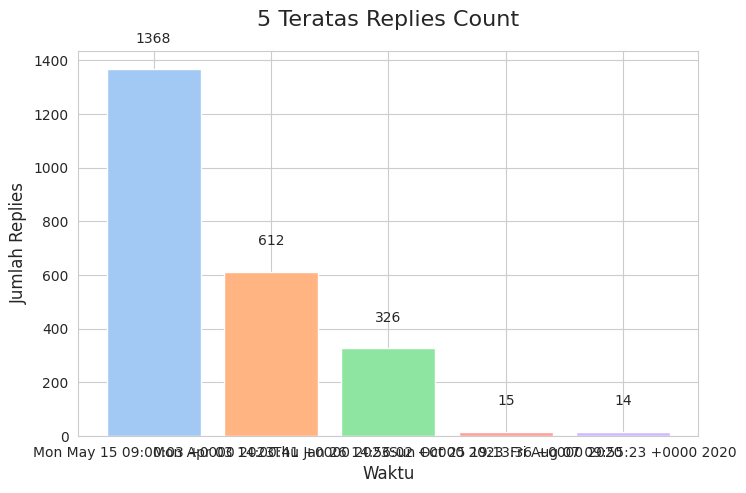

In [ ]:
# mengatur gaya plot
sns.set_style('whitegrid')

df_top10_replies = sumData.sort_values('reply_count', ascending=False).head(5)

# Diagram Replies Count
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(df_top10_replies['created_at'], df_top10_replies['reply_count'], color=sns.color_palette('pastel'))
ax.set_title('5 Teratas Replies Count', fontsize=16, pad=18)
ax.set_xlabel('Waktu', fontsize=12)
ax.set_ylabel('Jumlah Replies', fontsize=12)
for i, v in enumerate(df_top10_replies['reply_count']):
    ax.text(i, v + 100, str(v), ha='center')
plt.show()

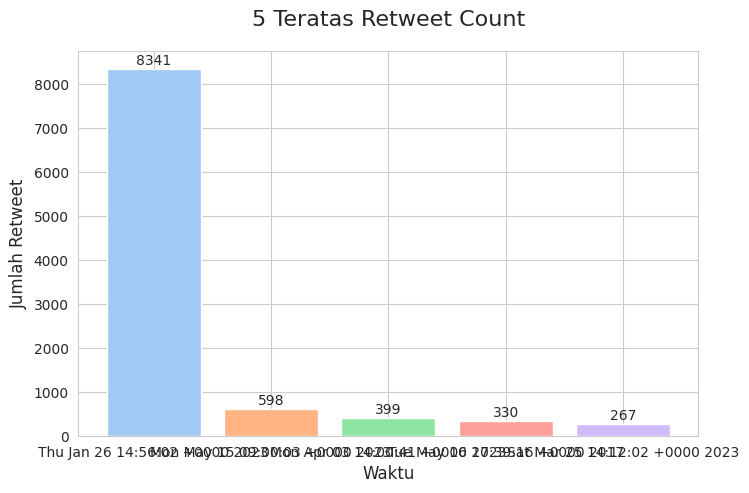

In [ ]:
# mengatur gaya plot
sns.set_style('whitegrid')

df_top10_retweet = sumData.sort_values('retweet_count', ascending=False).head(5)

# Diagram Retweet Count
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(df_top10_retweet['created_at'], df_top10_retweet['retweet_count'], color=sns.color_palette('pastel'))
ax.set_title('5 Teratas Retweet Count', fontsize=16, pad=18)
ax.set_xlabel('Waktu', fontsize=12)
ax.set_ylabel('Jumlah Retweet', fontsize=12)
for i, v in enumerate(df_top10_retweet['retweet_count']):
    ax.text(i, v + 100, str(v), ha='center')
plt.show()

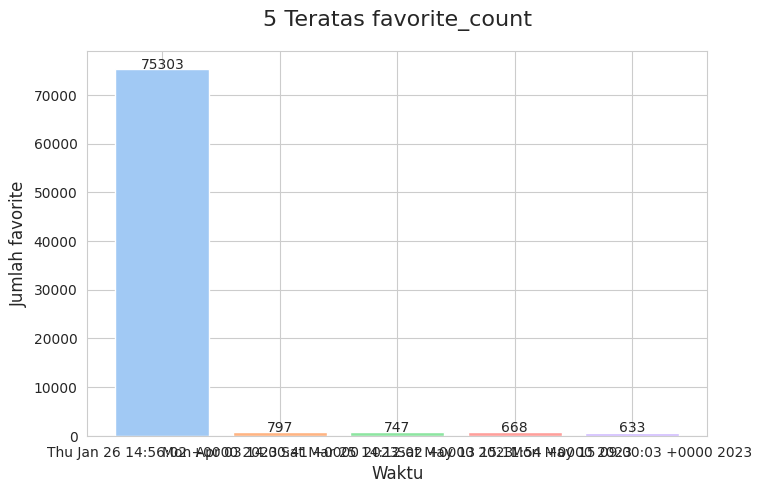

In [ ]:
# mengatur gaya plot
sns.set_style('whitegrid')

df_top10_retweet = sumData.sort_values('favorite_count', ascending=False).head(5)

# Diagram Retweet Count
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(df_top10_retweet['created_at'], df_top10_retweet['favorite_count'], color=sns.color_palette('pastel'))
ax.set_title('5 Teratas favorite_count', fontsize=16, pad=18)
ax.set_xlabel('Waktu', fontsize=12)
ax.set_ylabel('Jumlah favorite', fontsize=12)
for i, v in enumerate(df_top10_retweet['favorite_count']):
    ax.text(i, v + 100, str(v), ha='center')
plt.show()

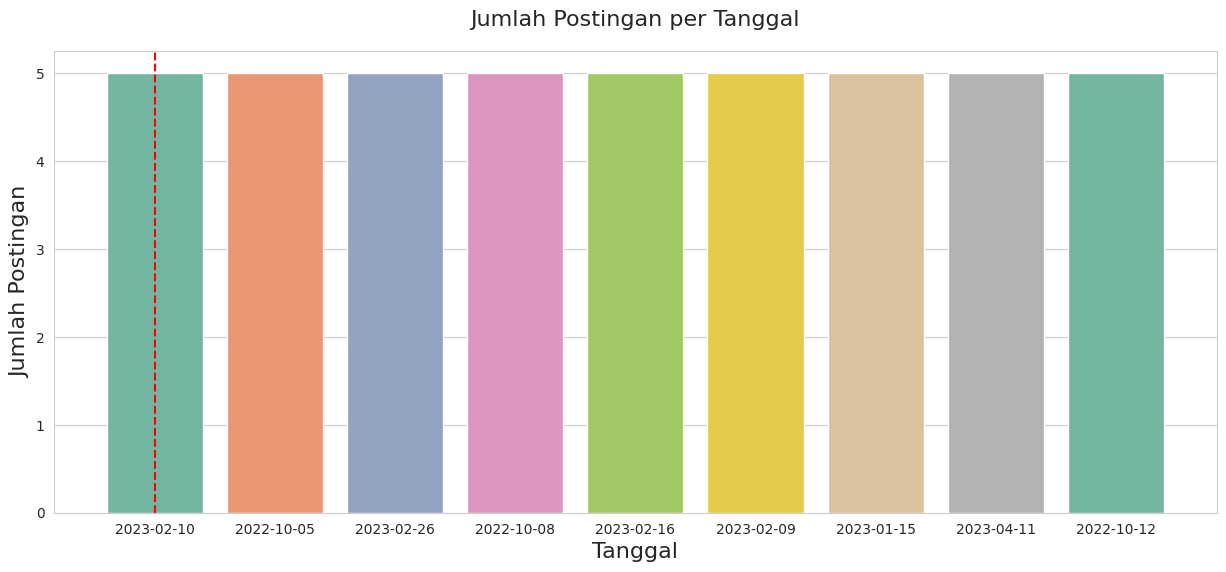

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datasetBTS-SKRIPSI-RandomForest.csv')

df['created_at'] = pd.to_datetime(df['created_at'])

# menghitung jumlah data per tanggal dan ambil 10 teratas
date_count = df['created_at'].value_counts().head(10)

# mendapatkan tanggal paling banyak di posting
most_active_date = date_count.idxmax().strftime('%Y-%m-%d')

# visualisasi data dalam bentuk diagram batang
sns.set_palette('pastel')
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x=date_count.index.strftime('%Y-%m-%d'), y=date_count.values, palette='Set2')
ax.axvline(x=most_active_date, color='r', linestyle='--')
plt.title('Jumlah Postingan per Tanggal', fontsize=16, pad=18)
plt.xlabel('Tanggal', fontsize=16)
plt.ylabel('Jumlah Postingan', fontsize=16)

# menampilkan jumlah posting pada setiap bar
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + 0.15, i.get_height() + 10))

plt.show()